#### Setup variables

In [3]:
n_mels = 64
frame_width = 0.04
hop_width = 0.02
epochs = 100
clip_length = 10 #s
sequence_length = int(clip_length/hop_width) # 10s/0.02s=500 frames
fs = 44100 #Hz
dropout = 0.3
conv_filters = 128
gru_units = 32
epochs = 100
learning_rate = 0.001

In [2]:
order = ['brakes squeaking','children','people speaking','large vehicle','people walking','car']

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('signal_test_antropy_normalized0db_zcr_sed17.csv',index_col=False)

# Sort the DataFrame by the given row order
df_sorted = df.sort_values(by='event', key=lambda x: x.map(dict(zip(order, range(len(order))))))

# Reset the index if necessary
df_sorted = df_sorted.reset_index(drop=True)

# Print the sorted DataFrame
print(df_sorted)

# print(data)

                event        SF        SE  mean_zcr
0    brakes squeaking  0.002248  2.710327  0.017004
1    brakes squeaking  0.005501  3.225906  0.027883
2    brakes squeaking  0.001434  2.697432  0.018608
3    brakes squeaking  0.001077  2.342011  0.014053
4    brakes squeaking  0.004439  2.901875  0.022658
..                ...       ...       ...       ...
485               car  0.002684  3.727376  0.035595
486               car  0.001067  3.617010  0.025067
487               car  0.002785  3.891315  0.039787
488               car  0.003147  3.678599  0.029948
489               car  0.001783  3.571347  0.036792

[490 rows x 4 columns]


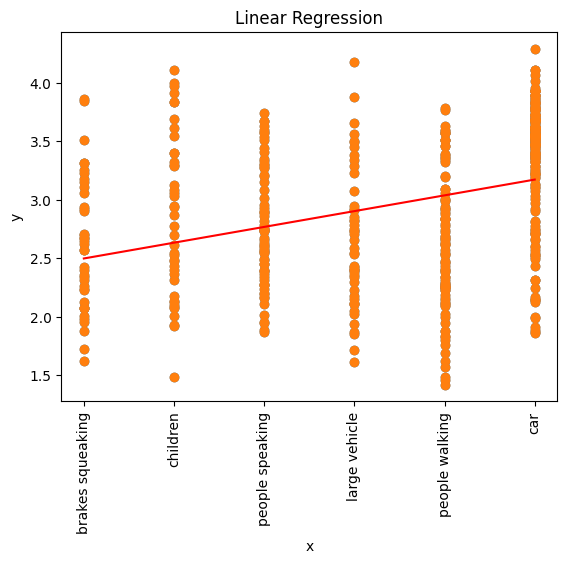

Pearson correlation coefficient: 0.35100107599120783
p-value: 1.1847442488960018e-15


In [7]:
from scipy.stats import pearsonr
import numpy as np

plt.scatter(df_sorted.event,df_sorted.SE)
plt.xticks(rotation=90)

x = pd.factorize(df_sorted['event'])[0]
y = df_sorted.SE

# Perform linear regression
m, b = np.polyfit(x, y, 1)

# Generate points for the line of best fit
x_line = np.linspace(min(x), max(x), 100)
y_line = m * x_line + b

# Create a scatter plot of the data
plt.scatter(x, y)

# Plot the line of best fit
plt.plot(x_line, y_line, color='red')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')

# Show the plot
plt.show()

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x, y)
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

### SE boxplot final

               event        SF        SE  mean_zcr
0                car  0.004088  3.602582  0.030381
1                car  0.002496  3.725982  0.035214
2           children  0.001573  3.399153  0.028560
3    people speaking  0.000738  3.671968  0.033892
4                car  0.002554  3.848006  0.036803
..               ...       ...       ...       ...
485   people walking  0.001940  1.879872  0.006399
486              car  0.001953  3.626146  0.039638
487              car  0.006033  4.294913  0.074019
488              car  0.002171  3.379823  0.028728
489              car  0.001783  3.571347  0.036792

[490 rows x 4 columns]


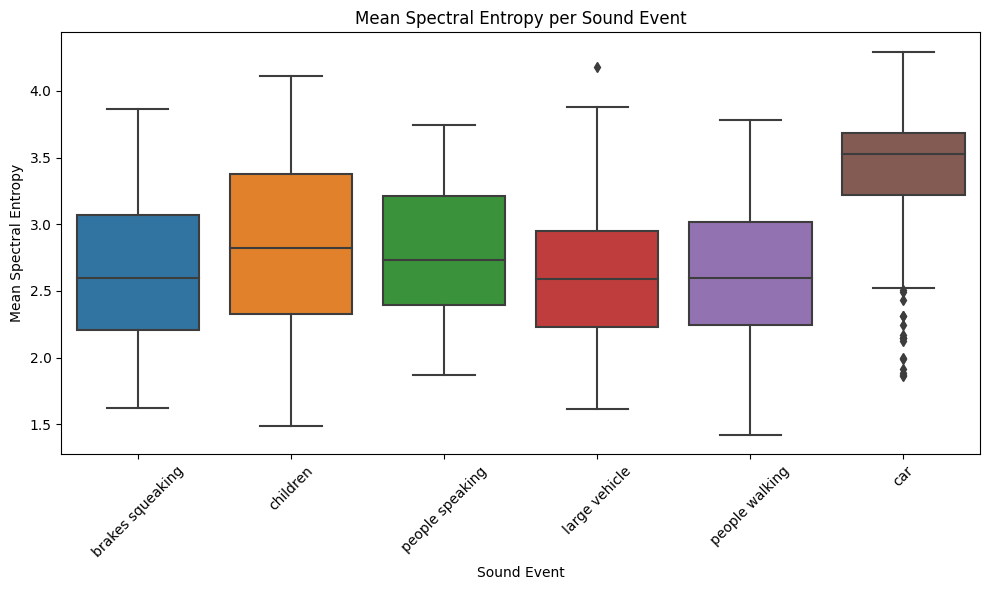

In [9]:
data = pd.read_csv('signal_test_antropy_normalized0db_zcr_sed17.csv',index_col=False)
print(data)


# order_df = data.groupby(["event"])
# order = order_df.median()["SE"].sort_values().index

import seaborn as sns
# Set up the plot
plt.figure(figsize=(10, 6))
# use order=event_lengths.event_label instead of order=order to order by event lengths
sns.boxplot(x = 'event', y = 'SE', data = df_sorted)

# Customize the plot
plt.xlabel('Sound Event')
plt.ylabel('Mean Spectral Entropy')
plt.title('Mean Spectral Entropy per Sound Event')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
# plt.yscale('log') 

plt.show()

### ZCR boxplot final

                 event        SF        SE  mean_zcr
0    water tap running  0.054574  0.735412  0.168011
1               dishes  0.020023  0.654973  0.133267
2               dishes  0.034678  0.688673  0.135098
3               dishes  0.037825  0.673155  0.132183
4               dishes  0.053950  0.718296  0.165982
..                 ...       ...       ...       ...
777       wind blowing  0.001154  0.256570  0.010574
778       wind blowing  0.000653  0.203960  0.008787
779       bird singing  0.000180  0.160133  0.007050
780       wind blowing  0.000173  0.158925  0.006699
781       bird singing  0.000206  0.154811  0.004865

[782 rows x 4 columns]


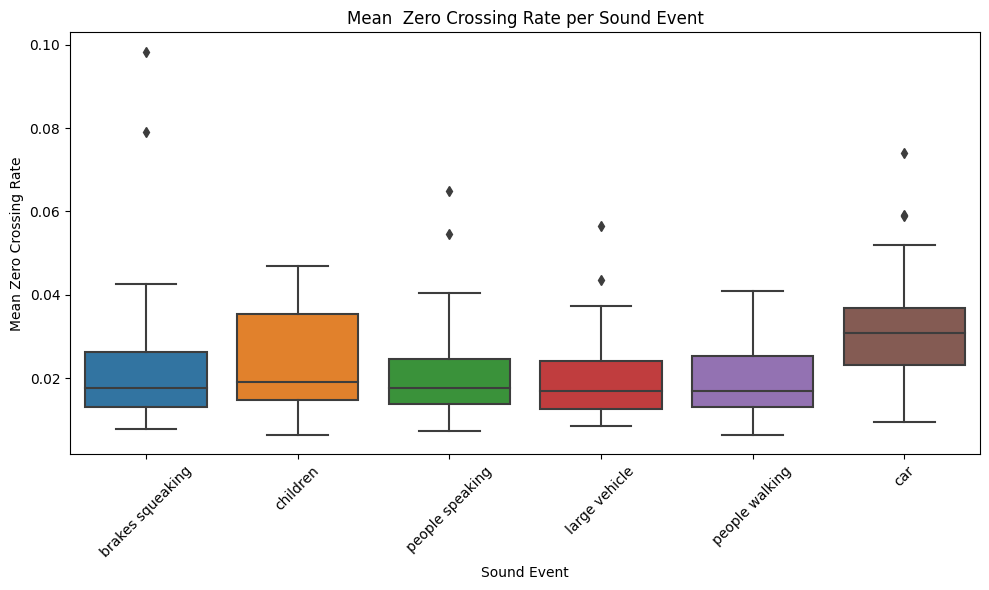

In [10]:
data = pd.read_csv('../signal_test_antropy_normalized0db_zcr.csv',index_col=False)
print(data)

order_df = data.groupby(["event"])
order = order_df.median()["mean_zcr"].sort_values().index

import seaborn as sns
# Set up the plot
plt.figure(figsize=(10, 6))
# use order=event_lengths.event_label instead of order=order to order by event lengths
sns.boxplot(x = 'event', y = 'mean_zcr', data = df_sorted)

# Customize the plot
plt.xlabel('Sound Event')
plt.ylabel('Mean Zero Crossing Rate')
plt.title('Mean  Zero Crossing Rate per Sound Event')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
# plt.yscale('log') 
plt.show()